In [1]:
import pandas as pd

WINTER_CSV_PATH = r"C:\Users\yairs\OneDrive\Documents\University\Master\Ships\routes expirements from noa\winter_data_final.csv"

df = pd.read_csv(WINTER_CSV_PATH)
df.head()

,Season,Name,Replicate,Place,Sampling Date,Body Size (cm),Temp 0,Temp 1,Temp 2,Temp 3,...,Lived 33,Lived 34,Lived 35,Lived 36,Lived 37,Lived 38,Lived 39,Lived 40,Lived 41,Lived 42
0,winter,PISCES,a,Ashdod,21.3.24,4.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,winter,PISCES,b,Ashdod,21.3.24,9.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,winter,PISCES,c,Ashdod,21.3.24,5.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,winter,ELPIDA,a,Ashdod,21.3.24,7.5,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,winter,ELPIDA,b,Ashdod,21.3.24,8.0,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Fix lived columns

# Identify columns matching the pattern "Lived {n}"
lived_columns = sorted([col for col in df.columns if 'Lived' in col], key=lambda x: int(x.split()[1]))

# Iterate over each row
for idx, row in df.iterrows():
    # Find the last column containing 1
    last_col_with_one = None
    for col in lived_columns:
        if row[col] == 1:
            last_col_with_one = col

    # Fill all previous columns with 1 if a column with 1 was found
    if last_col_with_one:
        last_col_index = lived_columns.index(last_col_with_one)
        df.loc[idx, lived_columns[:last_col_index + 1]] = 1

In [3]:
df.to_csv(r"C:\Users\yairs\OneDrive\Documents\University\Master\Ships\routes expirements from noa\winter_data_fixed_lived.csv")

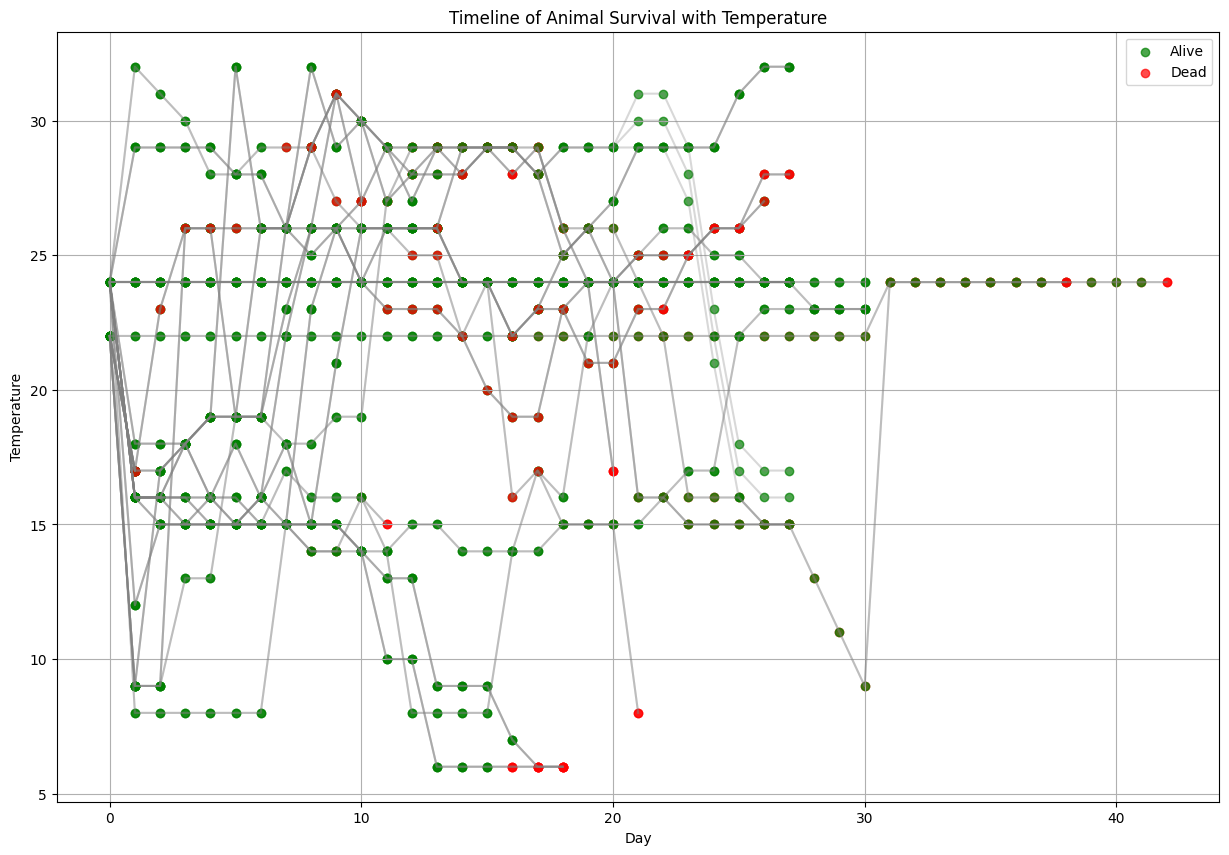

In [6]:
import matplotlib.pyplot as plt

# Creating a simplified plot
plt.figure(figsize=(15, 10))
temperature_columns = sorted([col for col in df.columns if 'Temp' in col], key=lambda x: int(x.split()[1]))

# Iterating through a subset of the data to plot timelines
for index, row in df.iterrows():
    survival = row[lived_columns].values
    temperature = row[temperature_columns].values
    days = range(len(survival))
    
    plt.plot(days, temperature, color='gray', alpha=0.3)  # Plot temperature line
    
    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]
    
    alive_temps = [temp for temp, status in zip(temperature, survival) if status == 1]
    dead_temps = [temp for temp, status in zip(temperature, survival) if status == 0]
    
    plt.scatter(alive_days, alive_temps, color='green', alpha=0.7, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_temps, color='red', alpha=0.7, label='Dead' if index == 0 else "")

plt.title('Timeline of Animal Survival with Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()